In [1]:
%reload_ext autoreload
%autoreload 2

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from main import LP

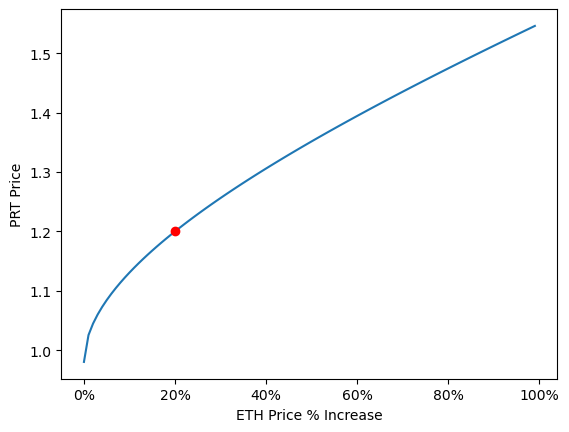

In [24]:
D = 20
P = 1.2
a = 1

lp = LP(100, D, P, a)
results = lp.prices_at_deltas()
df = pd.json_normalize(results)

fig, ax = plt.subplots()
ax.set_ylabel('PRT Price')
ax.set_xlabel('ETH Price % Increase')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(
        lambda x, p: '%.0f%%' % (x)
    )
)

plt.plot(df['delta'], df['price'])
plt.plot(D, P, 'ro')
None

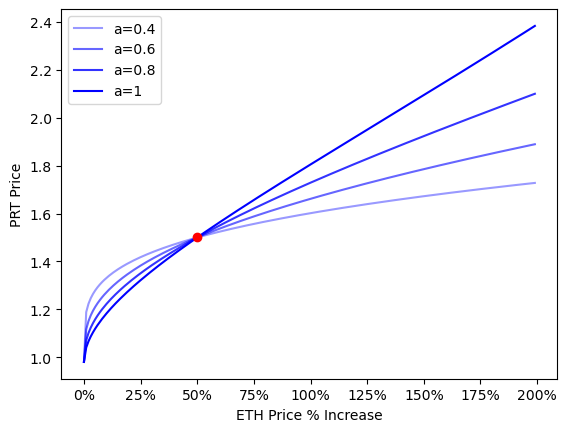

In [30]:
D = 50
P = 1.5
a_list = [0.4, 0.6, 0.8, 1]  # Adjustment factor to flatten out growth

fig, ax = plt.subplots()
ax.set_ylabel('PRT Price')
ax.set_xlabel('ETH Price % Increase')
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(
        lambda x, p: '%.0f%%' % (x)
    )
)

for a in a_list:
    lp = LP(100, D, P, a)
    results = lp.prices_at_deltas(200)
    df = pd.json_normalize(results)

    plt.plot(df['delta'], df['price'], label='a=%s' % a, alpha=a, color='blue')

plt.plot(D, P, 'ro')
plt.legend(loc='upper left')
None